QUESTION 2 
TIRZAH ATWIINE
M22B23/004

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
#for visualization
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns

In [18]:
df = pd.read_csv("Question2.csv")
df.head(40)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [8]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
duplicates = df[df.duplicated(subset=['id'])]
print(duplicates)

# duplicates = df[df.duplicated()]
# print(duplicates)

               id             date      price  bedrooms  bathrooms  \
94     6021501535  20141223T000000   700000.0         3       1.50   
314    4139480200  20141209T000000  1400000.0         4       3.25   
325    7520000520  20150311T000000   240500.0         2       1.00   
346    3969300030  20141229T000000   239900.0         4       1.00   
372    2231500030  20150324T000000   530000.0         4       2.25   
...           ...              ...        ...       ...        ...   
20181  7853400250  20150219T000000   645000.0         4       3.50   
20613  2724049222  20141201T000000   220000.0         2       2.50   
20670  8564860270  20150330T000000   502000.0         4       2.50   
20780  6300000226  20150504T000000   380000.0         4       1.00   
21581  7853420110  20150504T000000   625000.0         3       3.00   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
94            1580      5000     1.0           0     0  ...      8   
314           4290 

In [15]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]


In [16]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [23]:
df["date"]=pd.to_datetime(df["date"], format='%Y%m%dT%H%M%S').dt.date

df["bathrooms"]=df["bathrooms"].astype('int')
df["floors"]=df["floors"].astype('int')

In [20]:
df["date"]=pd.to_datetime(df["date"], format='%Y%m%d')

In [27]:
df.drop_duplicates()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2,1530,1131,3,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2,2310,5813,2,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0,1020,1350,2,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2,1600,2388,2,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [24]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


part b

In [29]:
floor_counts = df['floors'].value_counts().reset_index()

# Rename columns for better readability
floor_counts.columns = ['floors', 'count']

# Display the resulting DataFrame
print(floor_counts)

   floors  count
0       1  12590
1       2   8402
2       3    621


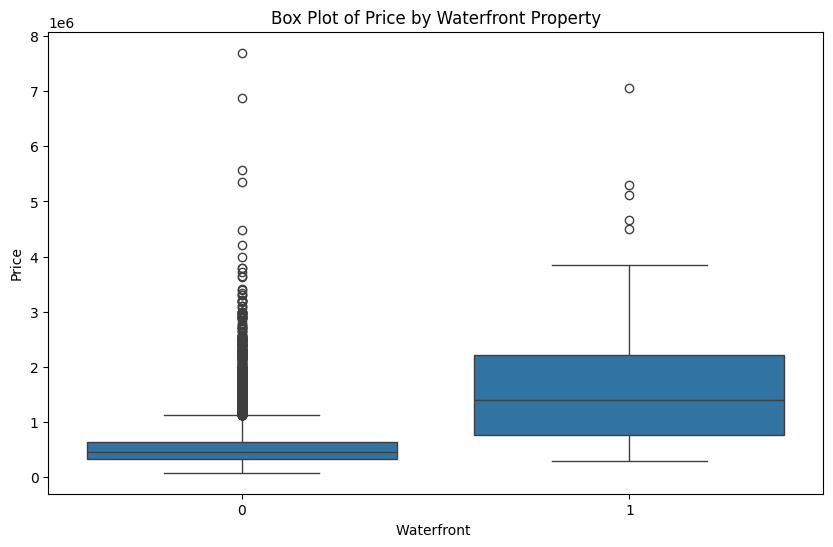

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a boxplot with 'waterfront' on the x-axis and 'price' on the y-axis
sns.boxplot(x='waterfront', y='price', data=df)

# Set plot labels and title
plt.xlabel("Waterfront ")
plt.ylabel("Price")
plt.title("Box Plot of Price by Waterfront Property")

# Show the plot
plt.show()


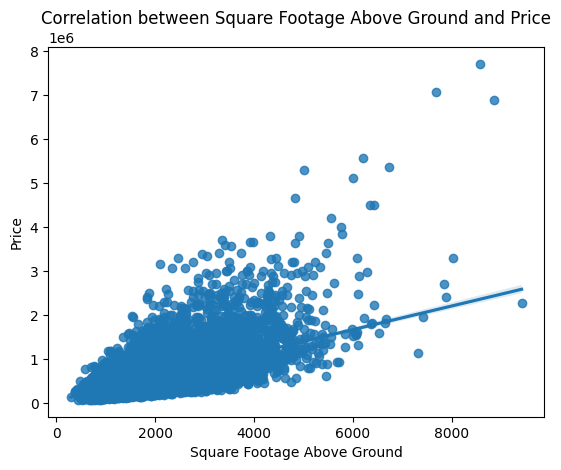

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.regplot(x="sqft_above", y="price", data=df)

plt.xlabel("Square Footage Above Ground")
plt.ylabel("Price")
plt.title("Correlation between Square Footage Above Ground and Price")
plt.show()



In [ ]:
correlation_matrix = df.corr()

# Get the correlations with 'price', sort them, and exclude 'price' itself
price_correlation = correlation_matrix["price"].sort_values(ascending=False)
most_correlated_feature = price_correlation.index[1]  # The first entry is 'price' itself, so we take the next one

print("Feature most correlated with price:", most_correlated_feature)
print("Correlation value:", price_correlation[most_correlated_feature])


In [41]:
df["date"]=pd.to_datetime(df["date"], format='%Y%m%d')

In [42]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms                 int64
sqft_living               int64
sqft_lot                  int64
floors                    int64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [43]:
df.corr()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.005577,-0.016762,0.001286,-0.000038,-0.012258,-0.132109,0.019120,-0.002721,0.011592,...,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
date,0.005577,1.000000,-0.004357,-0.016800,-0.029478,-0.034559,0.006313,-0.019079,0.001356,-0.001800,...,-0.039912,-0.027924,-0.019469,-0.000355,-0.024509,0.001404,-0.032856,-0.007020,-0.031515,0.002566
price,-0.016762,-0.004357,1.000000,0.308350,0.510072,0.702035,0.089661,0.237211,0.266369,0.397293,...,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,-0.016800,0.308350,1.000000,0.467452,0.576671,0.031703,0.155643,-0.006582,0.079532,...,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,-0.000038,-0.029478,0.510072,0.467452,1.000000,0.697875,0.085310,0.484822,0.058798,0.177257,...,0.606631,0.639933,0.250880,0.433647,0.060436,-0.159773,0.031351,0.179351,0.510049,0.080779
sqft_living,-0.012258,-0.034559,0.702035,0.576671,0.697875,1.000000,0.172826,0.353321,0.103818,0.284611,...,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.006313,0.089661,0.031703,0.085310,0.172826,1.000000,-0.008951,0.021604,0.074710,...,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.019120,-0.019079,0.237211,0.155643,0.484822,0.353321,-0.008951,1.000000,0.019640,0.024658,...,0.472608,0.517913,-0.235836,0.578619,-0.007775,-0.096743,0.029567,0.159001,0.296561,-0.013252
waterfront,-0.002721,0.001356,0.266369,-0.006582,0.058798,0.103818,0.021604,0.019640,1.000000,0.401857,...,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,-0.001800,0.397293,0.079532,0.177257,0.284611,0.074710,0.024658,0.401857,1.000000,...,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575


In [44]:
correlation_matrix = df.corr()

# Get the correlations with 'price', sort them, and exclude 'price' itself
price_correlation = correlation_matrix["price"].sort_values(ascending=False)
most_correlated_feature = price_correlation.index[1]  # The first entry is 'price' itself, so we take the next one

print("Feature most correlated with price:", most_correlated_feature)
print("Correlation value:", price_correlation[most_correlated_feature])

Feature most correlated with price: sqft_living
Correlation value: 0.7020350546118005


In [60]:
df.to_csv("Tirzah2.csv", index=False)

part C

In [61]:
df2= pd.read_csv('Tirzah2.csv')

df2.head(4)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000


In [62]:
x = df2[['sqft_living']] #predictor
Y = df2['price']

In [63]:
x_train, x_test, Y_train, Y_test=train_test_split(x,Y,test_size=0.3, random_state=42)

In [64]:
model=SVR()
model.fit(x_train, Y_train)

SVR()

In [65]:
Y_pred=model.predict(x_test)

In [53]:
mse=mean_squared_error(Y_test, Y_pred)
r2=r2_score(Y_test, Y_pred)
print(f"Mean squared error is {mse}  \nR2_score is {r2}")

Mean squared error is 152697374067.647  
R2_score is -0.05770618978982167


PART Cii

In [79]:
X = df2[['sqft_living','grade','sqft_above','sqft_living15']] #predictor
y = df2['price']

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=42)
model=SVR()
model.fit(x_train, Y_train)

Y_pred=model.predict(X_test)

mse=mean_squared_error(Y_test, Y_pred)
r2=r2_score(y_test, Y_pred)
print(f"Mean squared error is {mse}  \nR2_score is {r2}")

Mean squared error is 152781190349.28723  
R2_score is -0.058286769517779335


using decision tree

In [78]:
from sklearn.tree import DecisionTreeRegressor

df2= pd.read_csv('Tirzah2.csv')

df2.head(4)

X = df2[['sqft_living','grade','sqft_above','sqft_living15']] #predictor
y = df2['price']

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=42)

model=DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)


mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print(f"Mean squared error is {mse}  \nR2_score is {r2}")

Mean squared error is 104416983312.19086  
R2_score is 0.2767230593005662


partc iii

In [82]:
from sklearn.model_selection import GridSearchCV

df2= pd.read_csv('Tirzah2.csv')

df2.head(4)

X = df2[['sqft_living','grade','sqft_above','sqft_living15']] #predictor
y = df2['price']

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=42)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize GridSearchCV with the Decision Tree Regressor
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5, n_jobs=-1)

# Fit GridSearch to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)




Best Hyperparameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


0.2560228877449199

In [87]:
# Model with best hyperparameters
new_model = DecisionTreeRegressor(**best_params, random_state=42)
new_model.fit(X_train, y_train)

# Predictions and evaluation
new_predictions = new_model.predict(X_test)
new_mse = mean_squared_error(y_test, new_predictions)
print("Tuned Model MSE:", new_mse)

r2=r2_score(y_test, new_predictions)
print(f"Mean squared error is {mse}  \nR2_score is {r2}")

# Comparing Base Model vs Tuned Model
improvement = ((mse - new_mse) / mse) * 100
print(f"Improvement in MSE: {improvement:.2f}%")


Tuned Model MSE: 69171604648.65825
Mean squared error is 152781190349.28723  
R2_score is 0.5208612142723035
Improvement in MSE: 54.73%


below is hyperparemter tuning for svr and it takes long to run

In [ ]:
from sklearn.model_selection import GridSearchCV
df2= pd.read_csv('Tirzah2.csv')

df2.head(4)

X = df2[['sqft_living','grade','sqft_above','sqft_living15']] #predictor
y = df2['price']

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=42)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(SVR(), param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

# Evaluate the best model found
best_svr = grid_search.best_estimator_
y_pred_best = best_svr.predict(X_test)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best model parameters: {grid_search.best_params_}")
print(f"R² for best SVR model after hyperparameter tuning: {r2_best}")

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    "C": [0.1, 1, 10, 100],            # Regularization parameter
    "epsilon": [0.1, 0.2, 0.5, 1],     # Epsilon parameter in the loss function
    "kernel": ["linear", "rbf"]         # Kernel type
}

# Initialize the SVR model
model = SVR()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
grid_search.fit(x_train, Y_train)

# Retrieve the best model from GridSearchCV
best_model = grid_search.best_estimator_
print("Best Model Parameters:", grid_search.best_params_)